## Importações e configurações iniciais

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Leitura de dados com pandas
df = pd.read_csv("/content/dados_casas.csv")

# Visualizando as primeiras 5 linhas do dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Análise exploratória de dados


### Analisando as variáveis

In [69]:
# Retorna o número de linhas e colunas
df.shape

(21613, 21)

Podemos ver que esse conjunto de dados contém 21.613 linhas e 21 colunas.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Através do `.info` podemos entender quais os tipos dos nossos dados, quais colunas temos e se temos valores nulos.

Podemos usar o pandas para obter estatísticas resumidas de nossos dados. O método `.describe` nos dará também o número de valores

In [71]:
# Visão geral das estatisticas descritivas para as variáveis numéricas.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,914.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,1971.005136,1995.827133,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,29.373411,15.517107,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,2007.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000




***Vamos analisar*:**


**1. Coluna `price` (Preço)**
- Média (mean): indica que em média os preços de casas estão em torno de ~540.088 USD.
- Desvio padrão (std): ~367.127 USD, mostra uma grande variação nos preços das casas, sugerindo que pode haver casas de luxo e casas mais acessíveis no mesmo dataset.
- Mínimo e Máximo: o preço varia de 75.000 até 7.700.000 USD, reforçando a diversidade de tipos de propriedades no dataset.
*O alto desvio padrão e a grande diferença entre os valores mínimo e máximo **sugerem a presença de outliers**. Considerar investigação no futuro.

**2. Colunas `bedrooms` e `bathrooms` (Quartos e Banheiros)**
- Mínimo: Ambas têm valores mínimos de 0, o que pode ser um problema. Um valor de 0 para bathrooms não faz sentido para uma casa, indicando que há dados anômalos ou casas não residenciais.
- Máximo: bedrooms vai até 33, um número extremamente alto para uma casa típica, sugerindo um possível outlier ou erro de entrada de dados.
* Para valores 0, você pode considerar analisar se são dados válidos.

**3. Colunas `sqft_living` e `sqft_lot` (Área em Pés Quadrados)**
- Média (mean): A média da área habitável (sqft_living) é 2.079 pés², e a média da área do lote (sqft_lot) é 15.106 pés².
- Desvio Padrão (std): Ambos apresentam alta variação, especialmente sqft_lot, sugerindo uma grande diversidade no tamanho das propriedades.
- Mínimo e Máximo: O sqft_living varia de 290 até 13.540 pés². Já o sqft_lot tem um intervalo muito amplo, de 520 até 1.651.359 pés². Isso indica a presença de propriedades com tamanhos de lotes fora do padrão, como possivelmente grandes fazendas ou terrenos.

**4. Colunas `floors`, `waterfront`, e `view`**
- Floors: Varia de 1 a 3,5, sugerindo casas com múltiplos andares. A média é 1,5, indicando que a maioria das casas tem um ou dois andares.
- Waterfront: A média de 0,0075 mostra que poucas casas estão próximas a água. A maior parte dos valores é provavelmente 0.
- View: A média e o desvio padrão sugerem que a maioria das casas não tem uma vista de alta qualidade.

**5. Colunas `grade` e `condition` (Qualidade e Condição)**
- Grade: Varia de 1 a 13, com uma média de 7,7. Isso sugere que a maioria das casas tem uma qualidade média a acima da média.
- Condition: Varia de 1 a 5, com uma média de 3,4, indicando que a condição geral das casas é razoavelmente boa.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Com `.info` conseguimos extrair mais informações dos dados, quantos nulos, os tipos e colunas disponíveis no dataset.

### Verificando valores nulos

In [73]:
# Passo 1: Contar valores nulos em cada coluna
total_nulos = df.isnull().sum()

# Passo 2: Calcular a porcentagem de valores nulos
percentual_nulos = (total_nulos / len(df)) * 100

# Passo 3: Criar um DataFrame com os resultados
dados_nulos = pd.DataFrame({'Total': total_nulos, 'Percentual': percentual_nulos})

# Passo 4: Ordenar pelos maiores percentuais
dados_nulos = dados_nulos.sort_values(by='Total', ascending=False)

# Exibir as primeiras 20 colunas com valores nulos
dados_nulos.head(20)


,Total,Percentual
yr_renovated,20699,95.771064
id,0,0.000000
grade,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000
sqft_basement,0,0.000000
sqft_above,0,0.000000


### Analisando variáveis categóricas

Verificar a cardinalidade de uma coluna categórica significa contar o número de valores únicos (distintos) presentes nessa coluna.

Por que a cardinalidade é importante?
- Análise Exploratória: Durante a análise exploratória, verificar a cardinalidade ajuda a entender a diversidade dos dados em uma coluna categórica. Por exemplo, se uma coluna "Cidade" tiver alta cardinalidade (muitas cidades diferentes), ela pode ser tratada de forma diferente em análises e modelos.

- Modelagem: Em modelos de machine learning, colunas categóricas com alta cardinalidade (muitos valores únicos) podem criar desafios. Saber a cardinalidade ajuda a decidir a melhor forma de tratar essas colunas.

In [74]:
# Para a coluna de condition, quantas categorias diferentes podemos ter?
df.condition.value_counts()

,count
condition,
Média,14031
Boa,5679
Excelente,1701
Regular,172
Ruim,30


<ipython-input-75-55630cc6563b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='condition', palette='viridis')


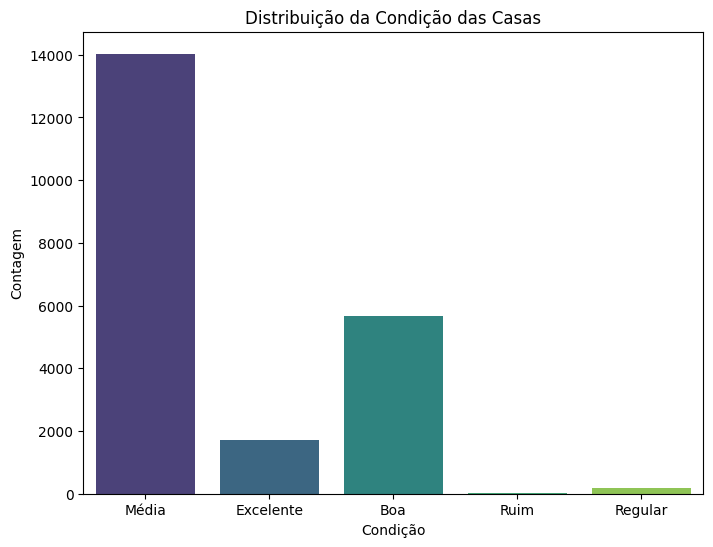

In [75]:
# Plotando um gráfico de barras para a variável categórica 'condition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='condition', palette='viridis')
plt.title('Distribuição da Condição das Casas')
plt.xlabel('Condição')
plt.ylabel('Contagem')
plt.show()

## Limpeza e transformação dos dados

### Ajustar tipos das colunas

Entendendo sobre tipos de variáveis:

- **Variáveis categóricas:** representam grupos ou categorias e não têm um valor numérico natural associado.
 - Nominais: Variáveis categóricas que representam categorias sem ordem ou hierarquia. Os valores são apenas rótulos. Ex: sexo (M, F), cores.
 - Ordinais:  representam categorias com uma ordem ou hierarquia natural. Ex: nível de satisfação.

- **Variáveis numéricas**: expressam uma quantidade e podem ser medidas ou contadas.
 - Discretas: assumem valores inteiros e contáveis. Ex: quantidade de produtos vendidos.
 - Contínuas: podem assumir qualquer valor dentro de um intervalo, incluindo frações e decimais. Ex: altura, peso.


De acordo com isso, podemos assumir algumas mudanças nos tipos das nossas variáveis:


- **Variáveis de Identificação:** `id`
- **Variáveis Temporais:** `date`
- **Numéricas Contínuas:** `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `lat`, `long`, `sqft_living15`, `sqft_lot15`, `bathrooms`, `floors`.
- **Numéricas Discretas**: `bedrooms`,  `yr_built`, `yr_renovated`
- **Categóricas Nominais:** `waterfront`, `zipcode`
- **Categóricas Ordinais:** `view`, `condition`, `grade`

In [76]:
# Converter para variáveis numéricas
num_continuas = ['sqft_living', 'sqft_lot', 'sqft_above',
                 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df[num_continuas] = df[num_continuas].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0.0,1955,NaN,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910.0,1965,NaN,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0.0,1987,NaN,98074,47.6168,-122.045,1800.0,7503.0


In [79]:
# #Converter para variáveis numéricas discretas
# num_discretas = ['yr_built', 'yr_renovated']
# df[num_discretas] = df[num_discretas].astype(int)

# # Acusa erro, porque como verificamos temos valores nulos
# # Vamos ver isso depois

In [80]:
#Converter para variáveis categóricas
categoricas = ['waterfront', 'view', 'grade', 'zipcode']
df[categoricas] = df[categoricas].astype('object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  object 
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  object 
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [82]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0.0,1955,NaN,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910.0,1965,NaN,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0.0,1987,NaN,98074,47.6168,-122.045,1800.0,7503.0


### Valores duplicados

In [83]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  object 
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  object 
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

### Tratando valores nulos

Tratar valores nulos é uma etapa que deve ser feita com cuidado.

- **Remover valores nulos nem sempre é a melhor opção**. É fundamental entender a origem desses valores e o contexto do conjunto de dados antes de tomar qualquer decisão.
- **Cuidado**: Remover muitas linhas com valores nulos pode resultar na perda de informações importantes e prejudicar suas análises.

- Investigue por que o valor está ausente. Dependendo da situação, você pode decidir entre:
    - **Excluir**: Remover completamente as linhas com valores nulos (somente se os nulos não carregam nenhuma informação relevante).
    - **Preencher**: Substituir os valores nulos por uma média, mediana, ou valor mais apropriado (imputação).

- Se o objetivo final for construir um modelo de Machine Learning, trate os nulos com muita atenção:
    - **Remova nulos** apenas se:
        - O valor ausente realmente não tem significado algum.
        - Sua remoção não afetará a qualidade dos dados restantes.

No caso da coluna `yr_renovated`, onde o valor nulo significa que a casa não foi renovada, é mais apropriado tratar esses nulos de uma forma que represente essa informação.

Então podemos começar preenchendo os valores nulos com 0, indicando que não houve renovação.

In [84]:
# Preenchendo os valores nulos da coluna 'yr_renovated' com 0
df['yr_renovated'].fillna(0, inplace=True)

<ipython-input-84-a0fba3838f6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['yr_renovated'].fillna(0, inplace=True)


### Criando novas colunas?

Sugestão: Criar uma nova coluna booleana que indica se a casa foi renovada ou não (a partir da coluna `yr_renovated`). Isso porque a informação de renovação é relevante e pode ser útil para análises e modelagens futuras.

In [85]:
# Definir uma função normal com if
def converter_para_booleana(valor):
    if valor != 0:
        return 1
    else:
        return 0

# Usar a função com apply
df['renovated'] = df['yr_renovated'].apply(converter_para_booleana)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,770.0,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0


In [86]:
#df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

Na coluna `sqft_basement` podemos perceber muitos zeros também, então podemos criar uma nova coluna booleana pra dizer se tem basement ou não. Se é igual a 0, quer dizer que não tem.

In [87]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0


### Investigando outliers

#### **Coluna `price`**

Como vimos anteriormente, essa coluna apresenta um alto desvio padrão e uma diferença grande entre valores de máximo e mínimo que podem sugerir a presença de outliers.


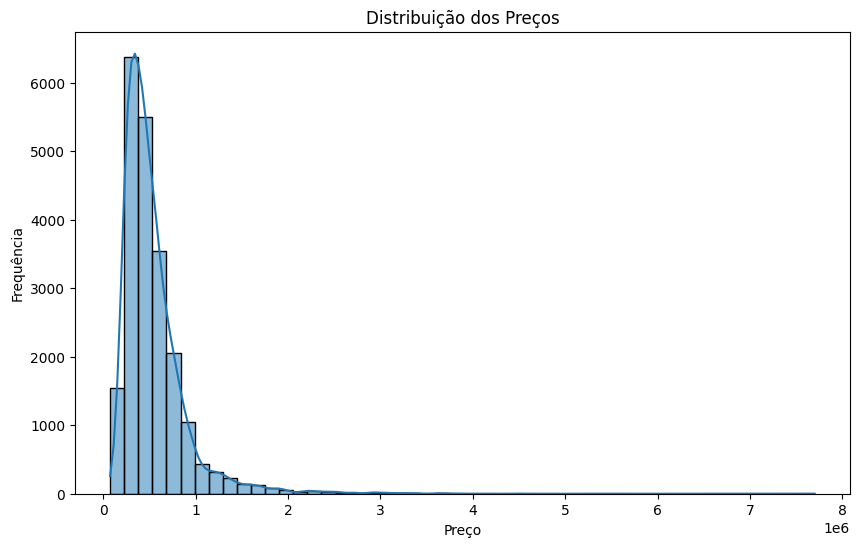

In [88]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Este gráfico mostra a distribuição dos preços das casas.

- O gráfico apresenta uma distribuição altamente assimétrica à direita, também conhecida como uma distribuição com cauda longa à direita. A maioria dos preços das casas está concentrada em um intervalo menor (mais próximo de zero) com uma diminuição gradual em direção à direita, onde estão os valores mais altos.

- A maioria das casas tem preços que se encontram em uma faixa mais baixa, principalmente abaixo de 1 milhão (1e6 no eixo x). Isso sugere que a maior parte das casas no conjunto de dados está em uma faixa de preço mais acessível.

- Outliers: A cauda longa à direita indica a presença de alguns valores extremos (outliers) nos preços das casas, que podem ser propriedades de luxo ou casas em áreas de alto valor. Esses outliers podem influenciar a média e o desvio padrão, o que é importante de se considerar no futuro ao construir modelos de machine learning.

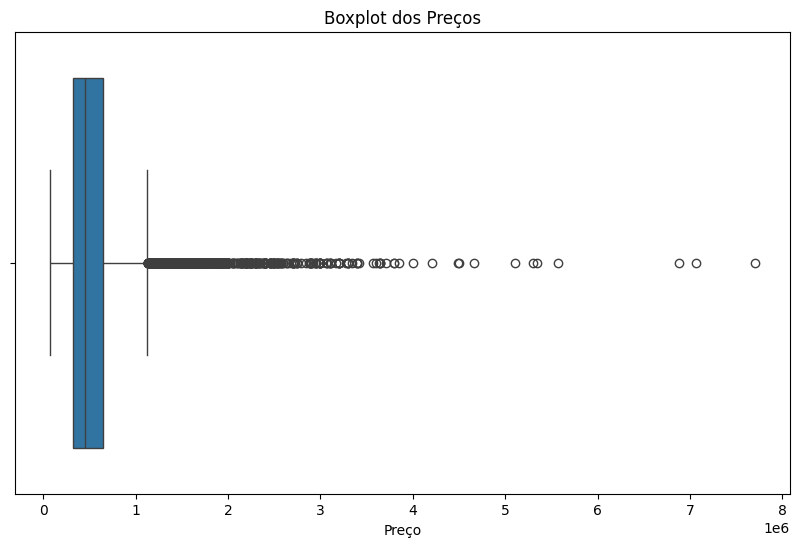

In [89]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot dos Preços')
plt.xlabel('Preço')
plt.show()

Este boxplot mostra a distribuição dos preços das casas e destaca a presença de muitos outliers.

- Caixa (Box): A caixa no meio representa o intervalo interquartil (IQR), que vai do primeiro quartil (Q1, 25%) ao terceiro quartil (Q3, 75%). A linha dentro da caixa é a mediana (o valor central). Isso mostra que a maioria dos preços das casas está concentrada em um intervalo relativamente estreito, próximo do lado esquerdo do gráfico.

- Linhas Verticais (Whiskers): As linhas que se estendem a partir da caixa indicam a amplitude dos dados que não são considerados outliers. Elas vão até o valor mínimo (Q1 - 1.5 * IQR) e o valor máximo (Q3 + 1.5 * IQR).

- Outliers (Pontos Fora da Caixa): Os círculos à direita da caixa representam os outliers. Neste caso, muitos outliers estão presentes, espalhados em um intervalo grande de preços, chegando a valores muito altos (até cerca de 8 milhões).

Próximos passos:
- Investigar os Outliers: Você pode investigar os outliers para ver se eles fazem sentido no contexto do seu problema (por exemplo, mansões, propriedades à beira-mar, etc.) ou se são erros nos dados.
- Tratar os Outliers: Se os outliers forem considerados ruído ou erros, você pode decidir removê-los ou transformá-los para análise e modelagem mais eficazes.

Vamos extrair os valores de outliers e analisar se fazem sentido.

In [90]:
# # Calcular o Q1, Q3 e IQR para a coluna 'price'
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir os limites para os outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Selecionar os outliers
# outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# # Exibir a tabela com apenas os outliers
# outliers_df


### Eliminando ruídos

Como vimos anteriormente, `bathrooms` possui valor mínimo de 0, o que é estranho, considerando que uma casa deve possuir um banheiro.

Provavelmente isso é alguma anomalia, portanto, podemos verificar quantos dados estão com 0 e remover da tabela.

In [91]:
zero_bathrooms_count = df[df['bathrooms'] == 0].shape[0]
print(f"Número de casas com 0 banheiros: {zero_bathrooms_count}")

Número de casas com 0 banheiros: 10


In [92]:
df = df[df['bathrooms'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21603 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21603 non-null  int64  
 1   date           21603 non-null  object 
 2   price          21603 non-null  float64
 3   bedrooms       21603 non-null  int64  
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21603 non-null  float64
 6   sqft_lot       21603 non-null  float64
 7   floors         21603 non-null  float64
 8   waterfront     21603 non-null  object 
 9   view           21603 non-null  object 
 10  condition      21603 non-null  object 
 11  grade          21603 non-null  object 
 12  sqft_above     21603 non-null  float64
 13  sqft_basement  21603 non-null  float64
 14  yr_built       21603 non-null  int64  
 15  yr_renovated   21603 non-null  float64
 16  zipcode        21603 non-null  object 
 17  lat            21603 non-null  float64
 18  long       

Além disso, também vemos `bedrooms` igual a 0. Casas residenciais devem ter pelo menos um quarto. Um número de quartos igual a 0 provavelmente indica um erro de entrada.

In [93]:
zero_bedrooms_count = df[df['bedrooms'] == 0].shape[0]
print(f"Número de casas com 0 quartos: {zero_bedrooms_count}")

Número de casas com 0 quartos: 6


In [94]:
# df = df[df['bedrooms'] != 0]
# df.info()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21603 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21603 non-null  int64  
 1   date           21603 non-null  object 
 2   price          21603 non-null  float64
 3   bedrooms       21603 non-null  int64  
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21603 non-null  float64
 6   sqft_lot       21603 non-null  float64
 7   floors         21603 non-null  float64
 8   waterfront     21603 non-null  object 
 9   view           21603 non-null  object 
 10  condition      21603 non-null  object 
 11  grade          21603 non-null  object 
 12  sqft_above     21603 non-null  float64
 13  sqft_basement  21603 non-null  float64
 14  yr_built       21603 non-null  int64  
 15  yr_renovated   21603 non-null  float64
 16  zipcode        21603 non-null  object 
 17  lat            21603 non-null  float64
 18  long       

In [96]:
# Filtrando as casas com 0 quartos e mais de 1 andar
suspect_houses = df[(df['bedrooms'] == 0) & (df['floors'] > 1)]
suspect_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
3467,1453602309,20140805T000000,288000.0,0,1.5,1430.0,1650.0,3.0,0,0,...,0.0,1999,0.0,98125,47.7222,-122.290,1430.0,1650.0,0,0
8477,2569500210,20141117T000000,339950.0,0,2.5,2290.0,8319.0,2.0,0,0,...,0.0,1985,0.0,98042,47.3473,-122.151,2500.0,8751.0,0,0
8484,2310060040,20140925T000000,240000.0,0,2.5,1810.0,5669.0,2.0,0,0,...,0.0,2003,0.0,98038,47.3493,-122.053,1810.0,5685.0,0,0
12653,7849202299,20150218T000000,320000.0,0,2.5,1490.0,7111.0,2.0,0,0,...,0.0,1999,0.0,98065,47.5261,-121.826,1500.0,4675.0,0,0


In [97]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0


Considerando que tem mais de um andar, não faz sentido não ter quartos, já que é um conjunto residencial.

In [98]:
indices_para_remover = df[(df['bedrooms'] == 0) & (df['floors'] > 1)].index

df = df.drop(indices_para_remover)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21599 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21599 non-null  int64  
 1   date           21599 non-null  object 
 2   price          21599 non-null  float64
 3   bedrooms       21599 non-null  int64  
 4   bathrooms      21599 non-null  float64
 5   sqft_living    21599 non-null  float64
 6   sqft_lot       21599 non-null  float64
 7   floors         21599 non-null  float64
 8   waterfront     21599 non-null  object 
 9   view           21599 non-null  object 
 10  condition      21599 non-null  object 
 11  grade          21599 non-null  object 
 12  sqft_above     21599 non-null  float64
 13  sqft_basement  21599 non-null  float64
 14  yr_built       21599 non-null  int64  
 15  yr_renovated   21599 non-null  float64
 16  zipcode        21599 non-null  object 
 17  lat            21599 non-null  float64
 18  long       

In [99]:
# new_df = df[~((df['bedrooms'] == 0) & (df['floors'] > 1))]

# new_df.info()

Uma coisa que notei também é que a coluna bedrooms possui casas com até 33 quartos. Isso parece estranho. Vamos tentar entender o que está acontecendo!

In [100]:
#verificar dados com bedrooms maiores de 10
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
8757,1773100755,20140821T000000,520000.0,11,3.00,3000.0,4960.0,2.0,0,0,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420.0,4960.0,1,1
15870,2402100895,20140625T000000,640000.0,33,1.75,1620.0,6000.0,1.0,0,0,...,580.0,1947,0.0,98103,47.6878,-122.331,1330.0,4700.0,0,1


Pela lógica nao faz sentido ter uma casa com 33 e 11 quartos e ter poucos banheiros.

Além disso, ter um sqft_living de 1620 pés quadrados, ter 33 quartos é praticamente impossível. Isso indica um erro nos dados, já que seria difícil acomodar tantos quartos em uma área tão pequena.

In [101]:
df = df[df['bedrooms'] < 10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21594 non-null  int64  
 1   date           21594 non-null  object 
 2   price          21594 non-null  float64
 3   bedrooms       21594 non-null  int64  
 4   bathrooms      21594 non-null  float64
 5   sqft_living    21594 non-null  float64
 6   sqft_lot       21594 non-null  float64
 7   floors         21594 non-null  float64
 8   waterfront     21594 non-null  object 
 9   view           21594 non-null  object 
 10  condition      21594 non-null  object 
 11  grade          21594 non-null  object 
 12  sqft_above     21594 non-null  float64
 13  sqft_basement  21594 non-null  float64
 14  yr_built       21594 non-null  int64  
 15  yr_renovated   21594 non-null  float64
 16  zipcode        21594 non-null  object 
 17  lat            21594 non-null  float64
 18  long       

### Removendo variáveis redundantes

Isso inclui variáveis que não serão usadas. Isso vai depender do problema que você estiver tentando resolver.


In [102]:
df_limpo = df.copy().drop(['id', 'yr_built', 'yr_renovated'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21594 non-null  object 
 1   price          21594 non-null  float64
 2   bedrooms       21594 non-null  int64  
 3   bathrooms      21594 non-null  float64
 4   sqft_living    21594 non-null  float64
 5   sqft_lot       21594 non-null  float64
 6   floors         21594 non-null  float64
 7   waterfront     21594 non-null  object 
 8   view           21594 non-null  object 
 9   condition      21594 non-null  object 
 10  grade          21594 non-null  object 
 11  sqft_above     21594 non-null  float64
 12  sqft_basement  21594 non-null  float64
 13  zipcode        21594 non-null  object 
 14  lat            21594 non-null  float64
 15  long           21594 non-null  float64
 16  sqft_living15  21594 non-null  float64
 17  sqft_lot15     21594 non-null  float64
 18  renovated  

## Análise multivariada

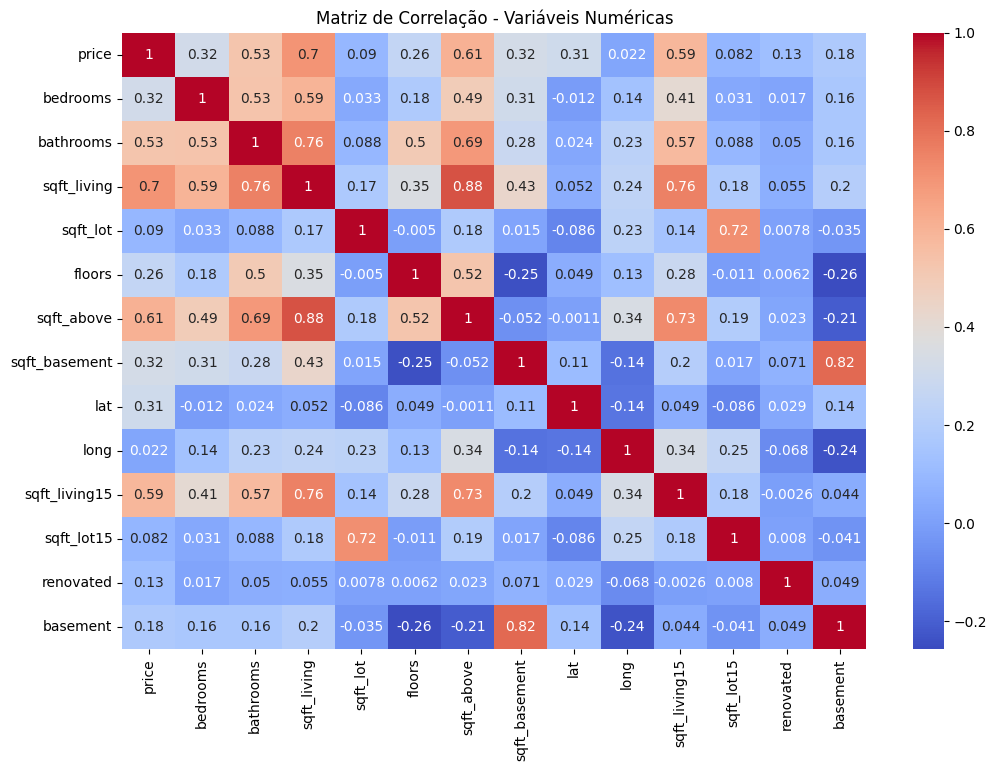

In [103]:
numeric_features = df_limpo.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_features.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


A matriz de correlação mostra o grau de relacionamento linear entre as variáveis numéricas do seu conjunto de dados. Os valores da matriz variam de -1 a 1:

- **1:** Correlação positiva perfeita. À medida que uma variável aumenta, a outra também aumenta.
- **-1:** Correlação negativa perfeita. À medida que uma variável aumenta, a outra diminui.
- **0:** Nenhuma correlação linear.

**Variáveis mais correlacionadas com o preço (`price`):**
   - `sqft_living` (0.70): Há uma forte correlação positiva, indicando que, quanto maior a área habitável, maior o preço.
   - `grade` (0.67): A qualidade da construção tem uma correlação significativa com o preço.
   - `sqft_above` (0.61): A área acima do solo também se correlaciona positivamente com o preço.


**Correlação entre variáveis:**
   - Há uma forte correlação entre `sqft_living` e `sqft_above` (0.88). Isso faz sentido, pois a área acima do solo geralmente compõe a maior parte da área habitável.
   - `sqft_lot` e `sqft_lot15` também estão altamente correlacionadas (0.72), o que pode indicar redundância.
   - `sqft_basement` tem uma alta correlação com `basement` (0.82), o que significa que as duas variáveis fornecem informações semelhantes. Você pode considerar manter apenas uma delas.

Próximos passos:

1. **Remover variáveis altamente correlacionadas:** Variáveis com alta correlação entre si, como `sqft_living` e `sqft_above`, podem causar multicolinearidade em modelos de regressão.
2. **Variáveis com baixa correlação:** Como `long`, pode ser descartada do modelo, dependendo do seu contexto e dos experimentos realizados.
3. **Criar variáveis:** Transformar variáveis como `zipcode` em categóricas pode ajudar a capturar a influência da localização em modelos como árvores de decisão ou regressão linear.

In [104]:
df_limpo.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Média,7,1180.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0
1,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Média,7,2170.0,400.0,98125,47.7210,-122.319,1690.0,7639.0,1,1
2,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Média,6,770.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0
3,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excelente,7,1050.0,910.0,98136,47.5208,-122.393,1360.0,5000.0,0,1
4,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Média,8,1680.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0


In [105]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21594 non-null  object 
 1   price          21594 non-null  float64
 2   bedrooms       21594 non-null  int64  
 3   bathrooms      21594 non-null  float64
 4   sqft_living    21594 non-null  float64
 5   sqft_lot       21594 non-null  float64
 6   floors         21594 non-null  float64
 7   waterfront     21594 non-null  object 
 8   view           21594 non-null  object 
 9   condition      21594 non-null  object 
 10  grade          21594 non-null  object 
 11  sqft_above     21594 non-null  float64
 12  sqft_basement  21594 non-null  float64
 13  zipcode        21594 non-null  object 
 14  lat            21594 non-null  float64
 15  long           21594 non-null  float64
 16  sqft_living15  21594 non-null  float64
 17  sqft_lot15     21594 non-null  float64
 18  renovated  

## Utilizando Plotly

In [106]:
!pip install plotly

In [107]:
import plotly.express as px

In [108]:
df_limpo_copy = df_limpo.copy()

In [109]:
# Contando a frequência de cada condição
condition_counts = df_limpo_copy['condition'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Count']

# Usando Plotly para criar um gráfico de barras das condições
fig = px.bar(condition_counts, x='Condition', y='Count', title='Distribuição das Condições das Casas',
             labels={'Count': 'Número de Casas', 'Condition': 'Condição'})

# Exibir o gráfico
fig.show()

In [110]:
# Criando o gráfico de mapa com Plotly Express
fig = px.scatter_mapbox(
    df_limpo_copy,
    lat='lat',
    lon='long',
    hover_name='condition',
    hover_data=['price'],
    color='condition',
    size='price',
    size_max=15,
    zoom=10,
    mapbox_style='open-street-map',
    title='Localização das Casas e Condições'
)

# Exibir o gráfico
fig.show()

In [111]:
# Criando o gráfico de mapa com Plotly Express, apenas com os preços
fig = px.scatter_mapbox(
    df_limpo_copy,
    lat='lat',
    lon='long',
    hover_name='price',  # Mostrando o preço no hover
    size='price',  # Tamanho dos balões depende do preço
    size_max=40,  # Ajuste o valor para destacar preços mais altos
    zoom=10,
    mapbox_style='carto-positron',
    title='Localização das Casas por Preço'
)

# Exibir o gráfico
fig.show()

In [112]:
# Categorizar preços em 'Alto', 'Médio' e 'Baixo' com base em um limiar
limiar_alto = df_limpo_copy['price'].quantile(0.75)  # Exemplo: acima do 75º percentil é considerado "Alto"
limiar_medio = df_limpo_copy['price'].quantile(0.25)  # Exemplo: entre 25º e 75º percentil é "Médio"

# Criar a coluna 'price_category'
df_limpo_copy['price_category'] = df_limpo_copy['price'].apply(lambda x: 'Alto' if x > limiar_alto else ('Médio' if x > limiar_medio else 'Baixo'))

# Filtrar somente as casas com preços "Alto"
df_limpo_outliers = df_limpo_copy[df_limpo_copy['price_category'] == 'Alto']

# Criando o gráfico de mapa com Plotly Express, apenas com as casas "Alto"
fig = px.scatter_mapbox(
    df_limpo_copy,
    lat='lat',
    lon='long',
    hover_name='price',  # Mostrando o preço no hover
    color='price_category',  # Usando a nova coluna para colorir os pontos
    size='price',
    size_max=30,
    zoom=10,
    mapbox_style='carto-positron',
    title='Localização das Casas com Preços Altos'
)

# Exibir o gráfico
fig.show()

In [113]:
# Identificando outliers usando o método do intervalo interquartil (IQR)
Q1 = df_limpo_copy['price'].quantile(0.25)
Q3 = df_limpo_copy['price'].quantile(0.75)
IQR = Q3 - Q1
limiar_superior = Q3 + 1.5 * IQR

# Criar a coluna 'is_outlier' para identificar os outliers
df_limpo_copy['is_outlier'] = df_limpo_copy['price'] > limiar_superior

# Filtrar apenas as casas identificadas como outliers
df_outliers = df_limpo_copy[df_limpo_copy['is_outlier']]

# Criando o gráfico de mapa com Plotly Express, apenas com os outliers
fig = px.scatter_mapbox(
    df_outliers,
    lat='lat',
    lon='long',
    hover_name='price',  # Mostrando o preço no hover
    color='is_outlier',  # Colorindo para destacar os outliers
    size='price',
    size_max=30,
    zoom=10,
    mapbox_style='carto-positron',
    title='Localização das Casas - Outliers de Preço'
)

# Exibir o gráfico
fig.show()

**Explicação do código:**

- `hover_name`: O que aparece ao passar o mouse sobre os pontos (neste caso, a condição da casa).
- `hover_data`: Dados adicionais a serem mostrados no hover, como o price.
- `color`: A coluna que define a cor dos pontos no mapa, neste caso, a coluna condition.
- `size`: A coluna que define o tamanho dos pontos no mapa, neste caso, o preço da casa (price).


Otamanho dos balões é determinado pela coluna especificada no parâmetro `size` (nesse caso, `price`).




## Colunas a remover

In [114]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21594 non-null  object 
 1   price          21594 non-null  float64
 2   bedrooms       21594 non-null  int64  
 3   bathrooms      21594 non-null  float64
 4   sqft_living    21594 non-null  float64
 5   sqft_lot       21594 non-null  float64
 6   floors         21594 non-null  float64
 7   waterfront     21594 non-null  object 
 8   view           21594 non-null  object 
 9   condition      21594 non-null  object 
 10  grade          21594 non-null  object 
 11  sqft_above     21594 non-null  float64
 12  sqft_basement  21594 non-null  float64
 13  zipcode        21594 non-null  object 
 14  lat            21594 non-null  float64
 15  long           21594 non-null  float64
 16  sqft_living15  21594 non-null  float64
 17  sqft_lot15     21594 non-null  float64
 18  renovated  

In [115]:
df_limpo = df_limpo.drop(['date', 'sqft_basement', 'zipcode'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  float64
 4   sqft_lot       21594 non-null  float64
 5   floors         21594 non-null  float64
 6   waterfront     21594 non-null  object 
 7   view           21594 non-null  object 
 8   condition      21594 non-null  object 
 9   grade          21594 non-null  object 
 10  sqft_above     21594 non-null  float64
 11  lat            21594 non-null  float64
 12  long           21594 non-null  float64
 13  sqft_living15  21594 non-null  float64
 14  sqft_lot15     21594 non-null  float64
 15  renovated      21594 non-null  int64  
 16  basement       21594 non-null  int64  
dtypes: float64(10), int64(3), object(4)
memory usage: 3.5+ 

### Removendo colunas com multicolinariedade

De acordo com o gráfico de multicolinearidade:
- `sqft_above`: Altamente correlacionada com `sqft_living`.
- `sqft_living15`: Altamente correlacionada com `sqft_living`. Escolha manter apenas uma das duas.
- `sqft_lot15`: Altamente correlacionada com `sqft_lot`.

In [116]:
df_limpo = df_limpo.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  object 
 7   view         21594 non-null  object 
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  object 
 10  lat          21594 non-null  float64
 11  long         21594 non-null  float64
 12  renovated    21594 non-null  int64  
 13  basement     21594 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 3.0+ MB


Multicolinearidade ocorre quando duas ou mais variáveis preditoras em um modelo de regressão estão altamente correlacionadas entre si. Isso significa que as variáveis fornecem informações semelhantes ao modelo.

- Problema: A multicolinearidade pode dificultar a determinação de quais variáveis realmente influenciam a variável alvo. Quando variáveis são altamente correlacionadas, pode ser difícil para o modelo identificar qual variável é a mais importante. Isso pode causar instabilidade nos coeficientes das variáveis preditoras, especialmente em modelos lineares como a regressão linear.
- Impacto: A presença de multicolinearidade pode inflar a variância dos coeficientes do modelo, tornando-o mais sensível a pequenas variações nos dados. Isso pode prejudicar a capacidade de generalização do modelo em novos dados.

## Convertendo variáveis categóricas

Precisamos converter modelos de ML pra variáveis numéricas já que dependem de operações matemáticas, e por isso precisam que as variáveis sejam numéricas.
- Dados categóricos em formato textual devem ser convertidos para números usando técnicas como **one-hot encoding**, **label encoding** ou **ordinal encoding** para permitir que os modelos aprendam a partir dessas informações.
- Converter variáveis categóricas em números ajuda a preservar a informação original e ajustá-la para a interpretação correta pelo modelo, evitando vieses por exemplo.

In [117]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  object 
 7   view         21594 non-null  object 
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  object 
 10  lat          21594 non-null  float64
 11  long         21594 non-null  float64
 12  renovated    21594 non-null  int64  
 13  basement     21594 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 3.0+ MB


In [118]:
df_limpo['waterfront'].unique()

array([0, 1], dtype=object)

In [119]:
df_limpo['view'].unique()

array([0, 3, 4, 2, 1], dtype=object)

As colunas que estão como objeto são `waterfront`, `view`, `condition`, `grade`. Mas sabemos que somente a coluna condition que está como texto, as outras já estão em formato numérico, só precisam ser convertidas pra numérico.

In [120]:
# Converter 'waterfront' para tipo numérico
df_limpo['waterfront'] = df_limpo['waterfront'].astype(int)

In [121]:
# Converter 'grade' para tipo numérico
df_limpo['grade'] = df_limpo['grade'].astype(int)

In [122]:
# Converter 'view' para tipo numérico
df_limpo['view'] = df_limpo['view'].astype(int)

In [123]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  int64  
 7   view         21594 non-null  int64  
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  int64  
 10  lat          21594 non-null  float64
 11  long         21594 non-null  float64
 12  renovated    21594 non-null  int64  
 13  basement     21594 non-null  int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 3.0+ MB


In [124]:
data_teste = df_limpo.copy()

In [125]:
df_limpo['condition'].unique()

array(['Média', 'Excelente', 'Boa', 'Ruim', 'Regular'], dtype=object)

In [126]:
from sklearn.preprocessing import OrdinalEncoder


# Definindo a ordem correta das categorias
ordem = ['Ruim', 'Média', 'Regular', 'Boa', 'Excelente']  # Sua ordem específica

# Criando o OrdinalEncoder com as categorias na ordem correta
ordinal_encoder = OrdinalEncoder(categories=[ordem])

# Aplicando o Ordinal Encoding na coluna 'condition'
df_limpo['condition_encoded'] = ordinal_encoder.fit_transform(df_limpo[['condition']])

# Exibir o resultado
print(df_limpo)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00       1180.0    5650.0     1.0   
1      538000.0         3       2.25       2570.0    7242.0     2.0   
2      180000.0         2       1.00        770.0   10000.0     1.0   
3      604000.0         4       3.00       1960.0    5000.0     1.0   
4      510000.0         3       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50       1530.0    1131.0     3.0   
21609  400000.0         4       2.50       2310.0    5813.0     2.0   
21610  402101.0         2       0.75       1020.0    1350.0     2.0   
21611  400000.0         3       2.50       1600.0    2388.0     2.0   
21612  325000.0         2       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade      lat     long  renovated  \
0               0     0      Média      7  47.5112 -122.257          0   

In [127]:
df_limpo.drop('condition', axis=1, inplace=True)

In [128]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21594 non-null  float64
 1   bedrooms           21594 non-null  int64  
 2   bathrooms          21594 non-null  float64
 3   sqft_living        21594 non-null  float64
 4   sqft_lot           21594 non-null  float64
 5   floors             21594 non-null  float64
 6   waterfront         21594 non-null  int64  
 7   view               21594 non-null  int64  
 8   grade              21594 non-null  int64  
 9   lat                21594 non-null  float64
 10  long               21594 non-null  float64
 11  renovated          21594 non-null  int64  
 12  basement           21594 non-null  int64  
 13  condition_encoded  21594 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 3.0 MB


# Modelos de regressão


## Regressão linear múltipla

In [129]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21594 non-null  float64
 1   bedrooms           21594 non-null  int64  
 2   bathrooms          21594 non-null  float64
 3   sqft_living        21594 non-null  float64
 4   sqft_lot           21594 non-null  float64
 5   floors             21594 non-null  float64
 6   waterfront         21594 non-null  int64  
 7   view               21594 non-null  int64  
 8   grade              21594 non-null  int64  
 9   lat                21594 non-null  float64
 10  long               21594 non-null  float64
 11  renovated          21594 non-null  int64  
 12  basement           21594 non-null  int64  
 13  condition_encoded  21594 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 3.0 MB


In [130]:
df_limpo = df_limpo[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                     'waterfront', 'view', 'grade', 'renovated', 'basement', 'condition_encoded']]

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Selecionando as variáveis independentes (features) e a dependente (alvo)
X = df_limpo[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
             'waterfront', 'view', 'grade', 'renovated', 'basement', 'condition_encoded']]

y = np.log(df['price'])  # Variável alvo (preço)

# Dividindo os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando os dados para normalização
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo de regressão linear
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = reg.predict(X_test_scaled)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo o MSE e o R²
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

# Exibir as previsões juntamente com os dados reais
df_result = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(df_result.head())



Mean Squared Error (MSE): 0.10624128879930674
Coeficiente de Determinação (R²): 0.6192113036242078
       Actual Price  Predicted Price
3690      11.794338        12.500055
11823     12.945626        12.791130
4041      13.110291        12.813382
3440      12.779873        12.813369
19306     13.314635        12.813789


In [138]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')


MAPE: 2.02%



1. Mean Squared Error (MSE):
Valor: 4,222,847,825.93
Interpretação: O MSE mede a média dos erros ao quadrado entre os valores previstos e os valores reais. Quanto menor for o MSE, melhor o desempenho do modelo, pois significa que os erros (diferenças entre o valor real e o previsto) são pequenos.
No seu caso, o valor do MSE é alto, o que indica que há uma diferença considerável entre as previsões e os preços reais. Isso pode ser esperado em modelos iniciais, mas pode ser melhorado.
2. Coeficiente de Determinação (R²):
Valor: 0.70
Interpretação: O R² indica a proporção da variância nos dados que é explicada pelo modelo. Um valor de R² próximo de 1 indica que o modelo está explicando bem os dados.
No seu caso, um R² de 0.70 indica que aproximadamente 70% da variação no preço das casas pode ser explicada pelas variáveis independentes que você incluiu no modelo (como bedrooms, bathrooms, sqft_living, etc.). Isso é uma boa pontuação para um modelo de regressão, mas ainda há 30% de variação no preço que não está sendo explicada.
3. Preços Reais vs Preços Previstos:
Aqui, você tem os valores reais do preço da casa (Actual Price) e as previsões feitas pelo modelo (Predicted Price).
Em alguns casos, como o primeiro exemplo (índice 3690), o preço real era 132,500.0, mas o modelo previu 109,419.15, uma diferença significativa.
Em outros casos, como o exemplo do índice 11823, o preço real era 419,000, e o modelo previu 592,893.32, mostrando uma superestimação do valor.


**Possíveis Melhorias:**
- Tentar outros modelos: Modelos de regressão linear podem ter limitações quando as relações entre as variáveis não são lineares. Você pode considerar outros modelos mais complexos, como Random Forest ou Gradient Boosting, para melhorar as previsões.
- Outliers: Verifique se há outliers (valores muito distantes do padrão) nos seus dados que possam estar afetando o modelo. Outliers podem ter um impacto negativo na regressão linear.
Se você quiser ajustar o modelo ou explorar outras abordagens, podemos trabalhar em ajustes e melhorias juntos!

## Usando validação cruzada

In [139]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Selecionando as variáveis independentes (features) e a dependente (alvo)
X = df_limpo[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
             'waterfront', 'view', 'grade', 'renovated', 'basement', 'condition_encoded']]

y = np.log(df['price'])  # Variável alvo (preço)

# Escalando os dados para normalização
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Escalando todo o dataset

# Criando o modelo de regressão linear
reg = LinearRegression()

# Definindo o número de folds para validação cruzada (ex: 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculando o MSE e R² com validação cruzada
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

mse_scores = cross_val_score(reg, X_scaled, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(reg, X_scaled, y, cv=kf, scoring=r2_scorer)

# Exibindo a média e o desvio padrão das métricas de validação cruzada
print(f'MSE (validação cruzada): {mse_scores.mean()} ± {mse_scores.std()}')
print(f'R² (validação cruzada): {r2_scores.mean()} ± {r2_scores.std()}')


MSE (validação cruzada): 0.10914850729374133 ± 0.001790738435251045
R² (validação cruzada): 0.6058658351182908 ± 0.011561941877205054


# Usando GridSearchCV

In [141]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],        # Número de árvores
    'max_depth': [3, 5, 7],                # Profundidade máxima
    'learning_rate': [0.01, 0.1, 0.2],     # Taxa de aprendizado
    'subsample': [0.8, 1.0],               # Proporção dos dados usada em cada árvore
    'colsample_bytree': [0.8, 1.0],        # Proporção de features usadas por árvore
    'reg_alpha': [0, 0.1, 1],              # Regularização L1
    'reg_lambda': [1, 10],                 # Regularização L2
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,                  # Modelo a ser ajustado
    param_grid=param_grid,          # Grid de hiperparâmetros
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    cv=5,                           # Validação cruzada (5-fold)
    verbose=1,                      # Exibe progresso
    n_jobs=-1                       # Paralelismo para acelerar
)

# Ajustando o Grid Search nos dados escalados
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor score na validação cruzada
print("Melhor score (MSE negativo):", grid_search.best_score_)

# Avaliação do modelo com os melhores hiperparâmetros no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE no conjunto de teste:", rmse)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

# Salvando modelos (serialização)

In [ ]:
import joblib

# Salvar o modelo treinado
joblib.dump(logreg, 'logistic_regression_model.pkl')

# Salvar o scaler que foi usado para normalizar os dados
joblib.dump(scaler, 'scaler.pkl')

print("Modelo e scaler salvos com sucesso!")

Modelo e scaler salvos com sucesso!


In [ ]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              21594 non-null  float64 
 1   bedrooms           21594 non-null  int64   
 2   bathrooms          21594 non-null  float64 
 3   sqft_living        21594 non-null  float64 
 4   sqft_lot           21594 non-null  float64 
 5   floors             21594 non-null  float64 
 6   waterfront         21594 non-null  int64   
 7   view               21594 non-null  int64   
 8   condition          21594 non-null  object  
 9   grade              21594 non-null  int64   
 10  lat                21594 non-null  float64 
 11  long               21594 non-null  float64 
 12  renovated          21594 non-null  int64   
 13  basement           21594 non-null  int64   
 14  condition_encoded  21594 non-null  float64 
 15  price_category     21594 non-null  category
dtypes: catego

In [ ]:
X_novo_dado = np.array([[3,      # bedrooms
                         2,      # bathrooms
                         2000,   # sqft_living
                         5000,   # sqft_lot
                         1,      # floors
                         0,      # waterfront
                         0,      # view
                         7,      # grade
                         47.5112, # lat
                         -122.257, # long
                         1999,   # renovated
                         1,      # basement
                         3]])    # condition_encoded

In [ ]:
# Carregar o modelo e o scaler salvos
logreg_loaded = joblib.load('logistic_regression_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

# Suponha que temos novos dados para fazer previsões (exemplo: X_novos_dados)
# Normalizar os novos dados da mesma forma que foi feito no treinamento
X_novos_dados_scaled = scaler_loaded.transform(X_novo_dado)

# Fazer previsões com o modelo carregado
y_pred_novos_dados = logreg_loaded.predict(X_novos_dados_scaled)

# Exibir as previsões
print("Previsões nos novos dados:", y_pred_novos_dados)

Previsões nos novos dados: [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

